<a href="https://www.kaggle.com/code/niramay/us-presidential-speech?scriptVersionId=108869532" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd 
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
speech_link = "https://millercenter.org/the-presidency/presidential-speeches/may-25-1961-goal-sending-man-moon"


html = requests.get(speech_link).text

soup = BeautifulSoup(html, "lxml")

transcript = soup.find("div", {"class": "view-transcript"})

print(transcript.text)




View Transcript
      




Transcript
Mr. Speaker, Mr. Vice President, my copartners in Government, gentlemen and ladies:

The Constitution imposes upon me the obligation to "from time to time give to the Congress information of the State of the Union." While this has traditionally been interpreted as an annual affair, this tradition has been broken in extraordinary times.

These are extraordinary times. And we face an extraordinary challenge. Our strength as well as our convictions have imposed upon this nation the role of leader in freedom's cause.

No role in history could be more difficult or more important. We stand for freedom. That is our conviction for ourselves—that is our only commitment to others. No friend, no neutral and no adversary should think otherwise. We are not against any man—or any nation—or any system—except as it is hostile to freedom. Nor am I here to present a new military doctrine, bearing any one name or aimed at any one area. I am here to promote the fre

In [3]:
# Removing the word "Transcript" from the beginning of the string
speech = transcript.text[10:]

# Replacing line breaks with spaces
speech = speech.replace("\n", " ")

# Import spaCy and load the language model
import spacy
nlp = spacy.load('en_core_web_sm')

# Process the speech through the NLP pipeline
processed_speech = nlp(speech)

# Collect the list of tokens from the processed_speech into a new list
# Exclude punctuation

token_list = []

for t in processed_speech:
  if t.is_punct != True:
    token_list.append(t.text)

# Convert the list of tokens to a string variable
clean_speech = " ".join(t for t in token_list)

print(clean_speech)

  I have not asked for a single program which did not cause one or all Americans some inconvenience or some hardship or some sacrifice But they have responded and you in the Congress have responded to your duty and I feel confident in asking today for a similar response to these new and larger demands It is heartening to know as I journey abroad that our country is united in its commitment to freedom and is ready to do its duty    View Transcript           


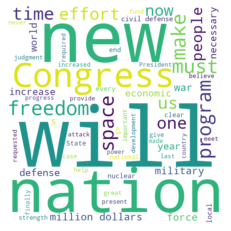

In [4]:


# matplotlib is a library for plotting graphs

# generate a wordcloud data file
wc = WordCloud(min_font_size=16, max_words=100, background_color="white",width=600,height=600).generate(clean_speech)

plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Save the word cloud file
wc.to_file("wc.png")